In [1]:
from tools.extract_tool import Extract_Tool

from langchain import hub
from langchain.agents import AgentExecutor, create_structured_chat_agent
from langchain.memory import ConversationBufferMemory
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_core.tools import Tool
from langchain_openai import ChatOpenAI

/Users/snehadharne/anaconda3/lib/python3.11/site-packages/langchain/chains/api/base.py:56: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from langchain_community.utilities.requests import TextRequestsWrapper
/Users/snehadharne/anaconda3/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:777: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `TextRequestsWrapper` to V2.
  warn(


In [27]:
response = Extract_Tool.invoke({'a': 'apple', 'b': 'net sales', 'c': '2021', 'd': '2023'})


In [3]:
response

([365817, 394328, 383285], [2021, 2022, 2023])

In [4]:
from tools.growth_tool import Growth_Tool

In [5]:
input_1 = {
    'sales_data' : [365817, 394328, 383285],
    'year_data':[2021, 2022, 2023]

}

In [6]:
response = Growth_Tool.invoke(input_1)

In [7]:
response

[7.7937876041846055, -2.8004605303199366]

In [8]:
import os
from dotenv import load_dotenv
from langchain.tools import tool
# from tools.expenses_tool import Extract_Tool

In [9]:
from tools import *

In [10]:
tools = [Extract_Tool,Growth_Tool, GrossmmarginpercTool,ExpensespercTool, TaxrateTool]

In [19]:
import os
from dotenv import load_dotenv
load_dotenv('key.env')  

key_string = os.getenv('open_ai_API_Key')

In [20]:
llm = ChatOpenAI(model="gpt-4o", openai_api_key=key_string)

In [21]:
prompt = hub.pull("hwchase17/structured-chat-agent")

/Users/snehadharne/anaconda3/lib/python3.11/site-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [22]:
memory = ConversationBufferMemory(
    memory_key="chat_history", return_messages=True)

In [23]:
agent = create_structured_chat_agent(llm=llm, tools=tools, prompt=prompt)

In [24]:
agent_executor = AgentExecutor.from_agent_and_tools(
    agent=agent,
    tools=tools,
    verbose=True,
    memory=memory,  # Use the conversation memory to maintain context
    handle_parsing_errors=True,  # Handle any parsing errors gracefully
)

In [25]:
initial_message = "You are an AI assistant that can provide helpful answers using available tools.\nIf you are unable to answer, you can use the following tools: Extract_Tool,Growth_Tool, GrossmmarginpercTool,ExpensespercTool, TaxrateTool"
memory.chat_memory.add_message(SystemMessage(content=initial_message))

In [26]:
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break

    # Add the user's message to the conversation memory
    memory.chat_memory.add_message(HumanMessage(content=user_input))

    # Invoke the agent with the user input and the current chat history
    response = agent_executor.invoke({"input": user_input})
    print("Bot:", response["output"])

    # Add the agent's response to the conversation memory
    memory.chat_memory.add_message(AIMessage(content=response["output"]))



> Entering new AgentExecutor chain...
Thought: To calculate the tax rate percentages for Apple for the years 2021 and 2022, I need to first extract the 'Provision for Income Taxes' and 'Net Sales' data for these years. Then, I can use the TaxrateTool to calculate the tax rate percentages.
Action:
```json
{
  "action": "Extract_Tool",
  "action_input": {
    "a": "Apple",
    "b": "Provision for Income Taxes",
    "c": "2021",
    "d": "2022"
  }
}
```([14527, 19300], [2021, 2022])Action:
```json
{
  "action": "Extract_Tool",
  "action_input": {
    "a": "Apple",
    "b": "Net Sales",
    "c": "2021",
    "d": "2022"
  }
}
```([365817, 394328], [2021, 2022])Action:
```json
{
  "action": "TaxrateTool",
  "action_input": {
    "Provision_of_IT_data": [14527, 19300],
    "year_data": [2021, 2022],
    "sales_data": [365817, 394328]
  }
}
```[3.971111238679449, 4.8944026292832365]Action:
```json
{
  "action": "Final Answer",
  "action_input": "The tax rate percentages for Apple for the ye

TypeError: unsupported operand type(s) for -: 'dict' and 'dict'

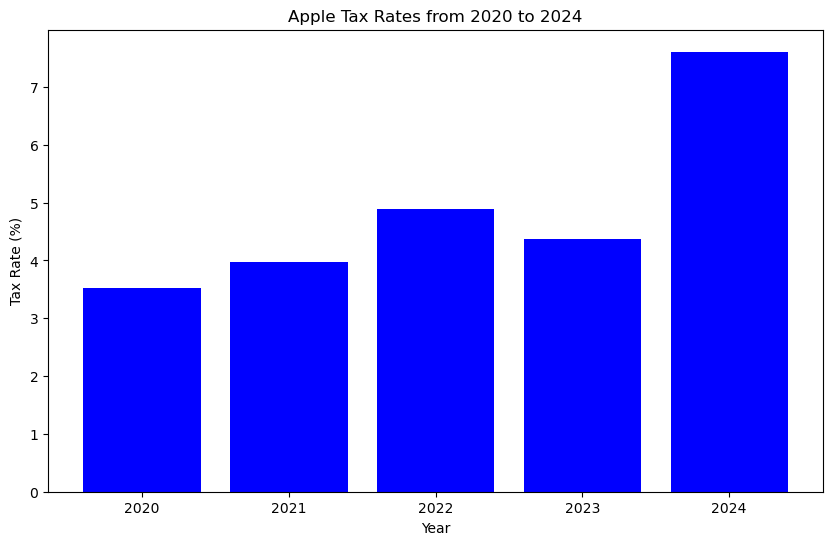

In [2]:
import matplotlib.pyplot as plt

# Tax rates data for Apple
years = [2020, 2021, 2022, 2023, 2024]
tax_rates = [3.53, 3.97, 4.89, 4.37, 7.61]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(years, tax_rates, color='blue')

# Add titles and labels
plt.title('Apple Tax Rates from 2020 to 2024')
plt.xlabel('Year')
plt.ylabel('Tax Rate (%)')
plt.xticks(years)

plt.savefig('temp.png')